# Machine Learning Foundation

## Section 2, Part d:  Regularization and Gradient Descent


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.


## Question 1

*   Import the data.

*   Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [1]:
import piplite
await piplite.install(['pandas', 'scikit-learn', 'seaborn', 'matplotlib'])

In [2]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
from pyodide.http import pyfetch
import numpy as np
import pandas as pd
 
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv"

#you will need to download the dataset; if you are running locally, please comment out the following 
await download(path, "X_Y_Sinusoid_Data.csv")

In [5]:
data = pd.read_csv('X_Y_Sinusoid_Data.csv')
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [6]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real) # sin(2 * pi * r)

In [7]:
sns.set_style('white')       # Sets the background style to 'white' (removes gridlines)
sns.set_context('talk')      # Adjusts font sizes to be readable for presentations
sns.set_palette('dark')      # Uses a dark color palette for the plot

In [8]:
data.set_index('x').head()

,y
x,
0.038571,0.066391
0.166776,1.027483
0.183153,1.245302
0.187359,1.004781
0.243116,1.264121


<Axes: xlabel='x'>

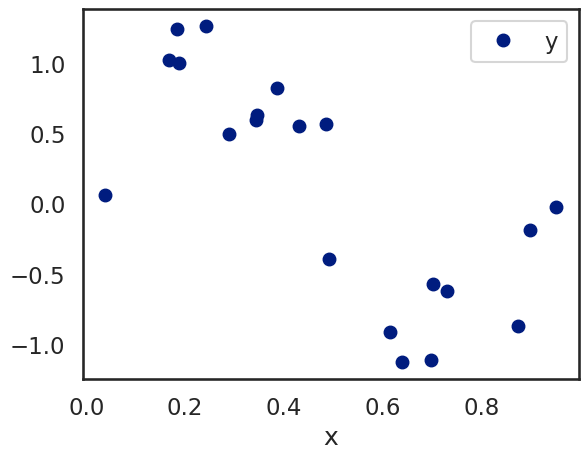

In [9]:
data.set_index('x').plot(ls='', marker='o', label='data')

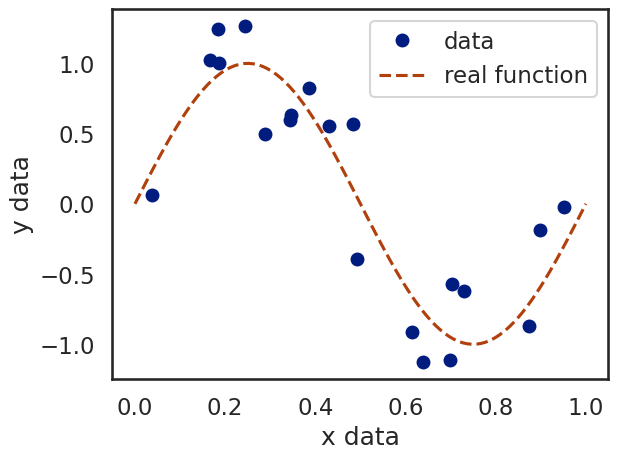

In [10]:
# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

## Question 2

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create $20^{th}$ order polynomial features.
*   Fit this data using linear regression.
*   Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


In [11]:
# import ML libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
# Setup the polynomial features
deg = 20
pf  = PolynomialFeatures(deg)
lr  = LinearRegression()

In [13]:
# Extract the X- and Y- data from the dataframe 
X_data = data[['x']]
Y_data = data['y']

In [14]:
# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
y_pred = lr.predict(X_poly)

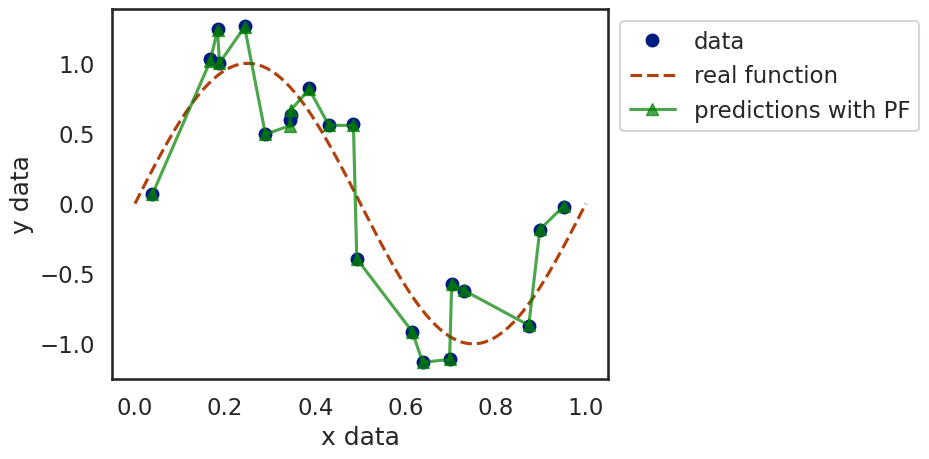

In [15]:
# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1) # raw data
plt.plot(X_real, Y_real, ls='--', label='real function')           # funcitonal data
plt.plot(X_data, y_pred, marker='^', c='green', alpha=.7, label='predictions with PF') # predicted data
plt.legend(loc='upper right', bbox_to_anchor=(1.65, 1)) # anchor legend box outside of the plot
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');
plt.show()

## Question 3

*   Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plot the results, as was done in Question 1.
*   Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?


In [16]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

In [17]:
# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

In [18]:
# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

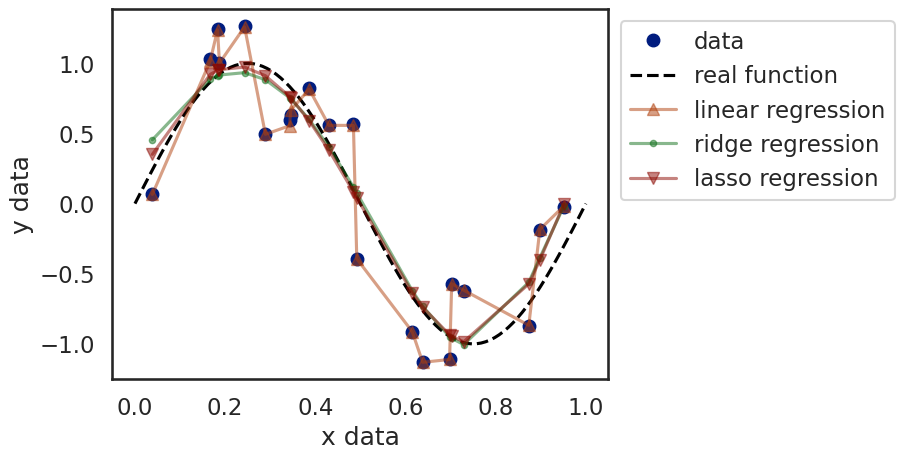

In [19]:
# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function', c='black')
plt.plot(X_data, y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='.', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='v', alpha=.5)

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [20]:
# let's look at the absolute value of coefficients for each model
coefficients = pd.DataFrame()
coefficients

""


In [21]:
np.ndim(lr.coef_)

1

In [22]:
np.ndim(lr.coef_.ravel())

1

In [23]:
coefficients['linear regression'] = lr.coef_
coefficients['ridge regression']  = rr.coef_
coefficients['lasso regression']  = lassor.coef_
coefficients

,linear regression,ridge regression,lasso regression
0,2.071946e+12,0.000000,0.000000
1,1.608880e+07,6.065176,8.490500
2,-4.631420e+08,-12.429635,-20.176708
3,7.634157e+09,-4.070127,1.641353
4,-8.224189e+10,2.307194,5.698488
5,6.200438e+11,4.432550,4.601939
6,-3.399270e+12,4.135200,2.170905
7,1.382705e+13,2.883507,0.252181
8,-4.197462e+13,1.484636,0.000000
9,9.414000e+13,0.307927,-0.000000


In [24]:
coefficients = coefficients.applymap(abs)
coefficients

,linear regression,ridge regression,lasso regression
0,2.071946e+12,0.000000,0.000000
1,1.608880e+07,6.065176,8.490500
2,4.631420e+08,12.429635,20.176708
3,7.634157e+09,4.070127,1.641353
4,8.224189e+10,2.307194,5.698488
5,6.200438e+11,4.432550,4.601939
6,3.399270e+12,4.135200,2.170905
7,1.382705e+13,2.883507,0.252181
8,4.197462e+13,1.484636,0.000000
9,9.414000e+13,0.307927,0.000000


In [25]:
# Huge difference in scale between non-regularized vs regularized regression
coefficients.describe()

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.733536e+13,2.169397,2.167284
std,5.998259e+13,2.900278,4.706731
min,1.608880e+07,0.000000,0.000000
25%,2.071946e+12,0.467578,0.000000
50%,3.589399e+13,1.017272,0.252181
75%,1.060736e+14,2.883507,1.641353
max,1.639079e+14,12.429635,20.176708


In [26]:
colors = sns.color_palette()
colors

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

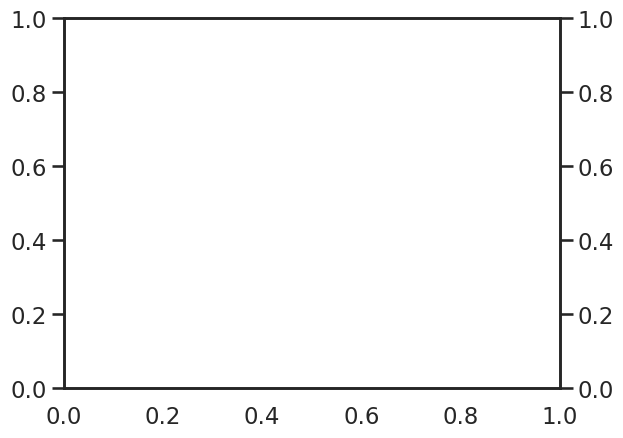

In [27]:
# setup the dual y-ases
ax1 = plt.axes()
ax2 = plt.twinx()

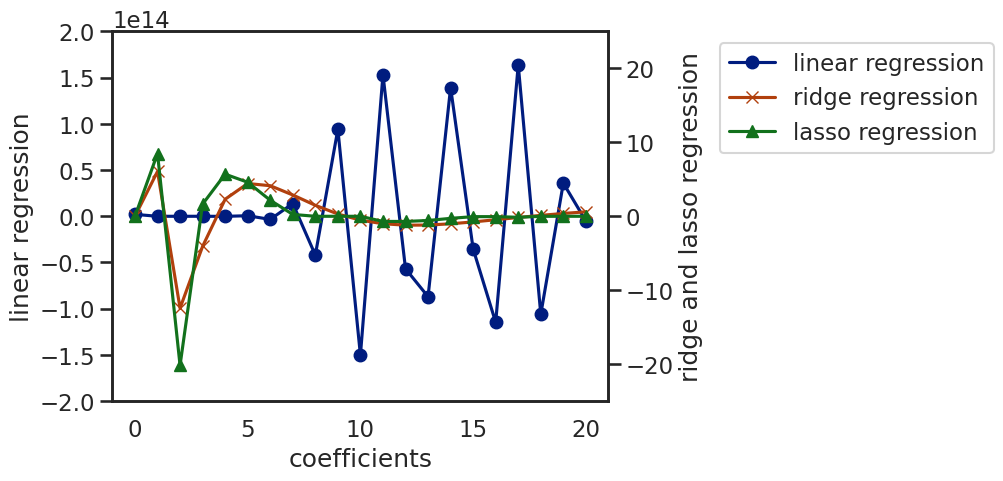

In [68]:
# setup the dual y-ases
ax1 = plt.axes()
ax2 = plt.twinx()

# plot the linear regression data
ax1.plot(lr.coef_,     color=colors[0], marker='o', label='linear regression')
ax2.plot(rr.coef_,     color=colors[1], marker='x', label='ridge regression')
ax2.plot(lassor.coef_, color=colors[2], marker='^', label='lasso regression')

# customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper right', bbox_to_anchor=(1.8,1))

ax1.set(xlabel='coefficients', ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

plt.show()

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

*   Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
*   Split the data into train and test sets.
*   Log transform skewed features.
*   Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.


In [29]:
import pyodide_http
pyodide_http.patch_all()

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv"
data = pd.read_csv(url)
# , encoding='UTF-8'
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.


In [30]:
data.shape

(1379, 80)

In [31]:
data.nunique()

1stFlrSF        738
2ndFlrSF        401
3SsnPorch        20
Alley             2
BedroomAbvGr      7
               ... 
WoodDeckSF      267
YearBuilt       109
YearRemodAdd     61
YrSold            5
SalePrice       640
Length: 80, dtype: int64

In [32]:
data.select_dtypes(include='object').nunique()

Alley             2
BldgType          5
BsmtCond          3
BsmtExposure      4
BsmtFinType1      5
BsmtFinType2      6
BsmtQual          4
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         4
ExterQual         4
Exterior1st      14
Exterior2nd      16
Fence             4
FireplaceQu       5
Foundation        6
Functional        7
GarageCond        5
GarageFinish      3
GarageQual        5
GarageType        6
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        3
MiscFeature       4
Neighborhood     25
PavedDrive        3
PoolQC            3
RoofMatl          8
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64

In [33]:
data = pd.get_dummies(data, drop_first=True) # automatically change obj columns
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=241)

In [34]:
data.shape

(1379, 241)

In [35]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,False,False,False,False,False,False,False,True,True,False
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,False,False,False,False,False,False,False,True,True,False
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,False,False,False,False,False,False,False,True,True,False
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,False,False,False,False,False,False,False,True,True,False
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,False,False,False,False,False,False,False,True,True,False


In [36]:
idx = data.columns.str.startswith('Neigh')
data.columns[idx]

Index(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

Next, split the data in train and test data sets.


In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.


In [38]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

In [39]:
float_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

In [40]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()
skew_vals

1stFlrSF          1.539692
2ndFlrSF          0.773655
3SsnPorch        10.150612
BsmtFinSF1        2.010766
BsmtFinSF2        4.466378
BsmtUnfSF         0.900308
EnclosedPorch     3.218303
GarageArea        0.838422
GarageYrBlt      -0.649707
GrLivArea         1.455564
LotArea          11.501694
LotFrontage       3.138032
LowQualFinSF     11.210638
MasVnrArea        2.492814
MiscVal          26.915364
OpenPorchSF       2.295489
PoolArea         15.777668
ScreenPorch       4.599803
TotalBsmtSF       1.979164
WoodDeckSF        1.334388
SalePrice         2.106910
dtype: float64

**Skewness Interpretation**  
- **Skewness = 0** $\to$ Perfectly symmetrical (normal distribution)
- **Skewness > 0** $\to$ Right-skewed (positive skew) → Longer tail on the right
- **Skewness < 0** $\to$ Left-skewed (negative skew) → Longer tail on the left

In [41]:
skew_cols = (skew_vals
            .sort_values(ascending=False)
            .to_frame()
            .rename(columns={0:'skewness'})
            .query('abs(skewness) > 0'.format(skew_limit)))
skew_cols

,skewness
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".


In [42]:
# test np.log1p()
x = np.array([0, 0.01, 0.1, 1, 10, 100])

print("Using np.log(x):", np.log(x))           # if x = 0, error
print("Using np.log(1 + x):", np.log(1 + x))   # if x = 0, not show error
print("Using np.log1p(x)  :", np.log1p(x))     # if x = 0, not show error

Using np.log(x): [       -inf -4.60517019 -2.30258509  0.          2.30258509  4.60517019]
Using np.log(1 + x): [0.         0.00995033 0.09531018 0.69314718 2.39789527 4.61512052]
Using np.log1p(x)  : [0.         0.00995033 0.09531018 0.69314718 2.39789527 4.61512052]


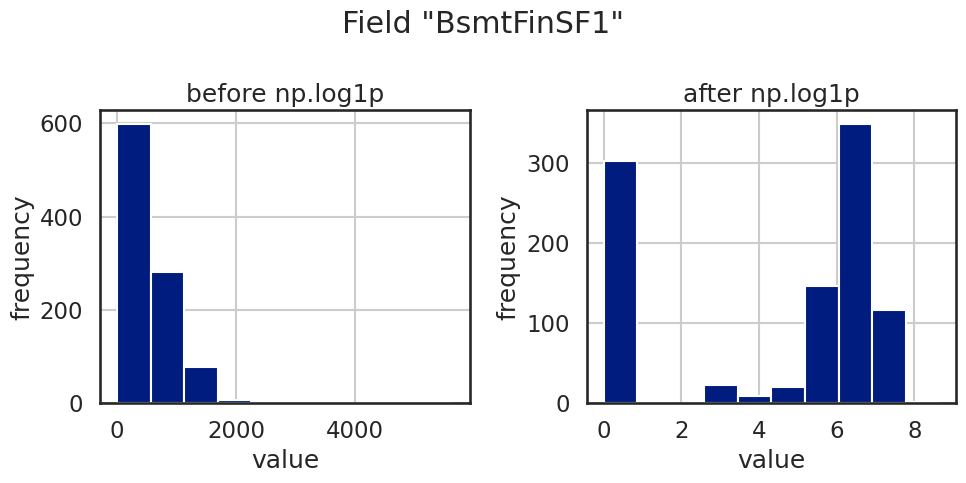

In [43]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)  # np.log(1 + x)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p',   ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

plt.tight_layout()
plt.show()
# a little bit better

In [44]:
skew_cols.head()

,skewness
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612


In [45]:
skew_cols.index.tolist()

['MiscVal',
 'PoolArea',
 'LotArea',
 'LowQualFinSF',
 '3SsnPorch',
 'ScreenPorch',
 'BsmtFinSF2',
 'EnclosedPorch',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF',
 'GarageArea',
 '2ndFlrSF',
 'GarageYrBlt']

In [46]:
# Mute the setting wtih a copy warnings
# pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing like above

In [47]:
train['SalePrice']

461      86000.0
976      84000.0
1128    176000.0
904     124000.0
506     272000.0
          ...   
1095    146000.0
1130    144000.0
1294    165500.0
860     174000.0
1126    165000.0
Name: SalePrice, Length: 965, dtype: float64

In [48]:
train['MiscVal']

461     0.000000
976     0.000000
1128    0.000000
904     0.000000
506     7.601402
          ...   
1095    0.000000
1130    0.000000
1294    0.000000
860     0.000000
1126    0.000000
Name: MiscVal, Length: 965, dtype: float64

Separate features from predictor.


In [49]:
[x for x in train.columns if x!='SalePrice']

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley_Pave',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_Y',
 'Condition1_Feedr',
 'C

In [50]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

## Question 5

*   Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.


In [51]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

*   Fit a basic linear regression model
*   print the root-mean-squared error for this model
*   plot the predicted vs actual sale price based on the model.


In [52]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)    # lower is better

42032.09507062372


In [53]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Axes: >

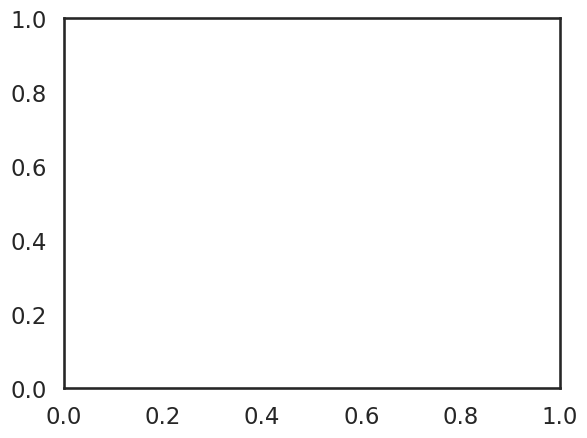

In [54]:
plt.axes()

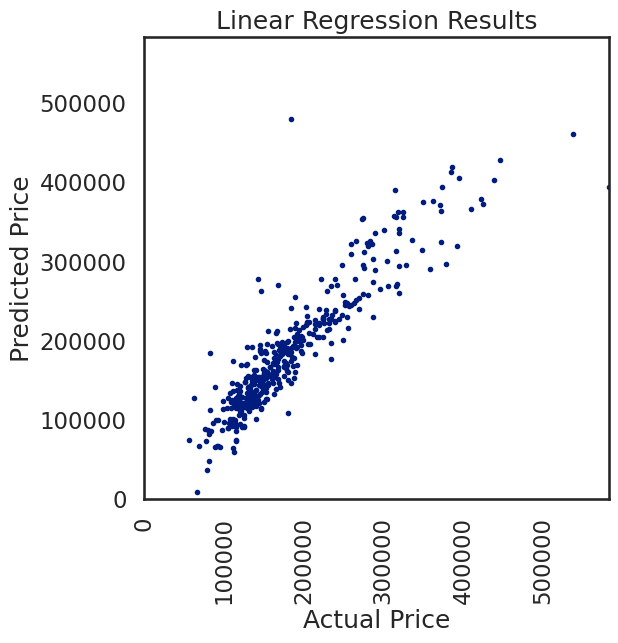

In [55]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');
plt.xticks(rotation=90)
plt.show()

# 45 degree means good prediction

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

*   Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
*   Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
*   Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.


In [56]:
from sklearn.linear_model import RidgeCV  # GridSearchCV for Ridge Regression

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

10.0 31973.653030381272


## Question 7

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

*   Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
*   Repeat this with the Elastic net model.
*   Compare the results via table and/or plot.

Use the following alphas:\
`[1e-5, 5e-5, 0.0001, 0.0005]`


In [57]:
from sklearn.linear_model import LassoCV  # GridSearchCV for Lasso

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=int(5e4),
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 46068.24763700672


We can determine how many of these features remain non-zero.


In [58]:
lassoCV.coef_.nonzero() # return index of the non-zero values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  72,  73,  74,  75,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182

In [59]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 240 coefficients, 230 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1\_ratios between 0.1 and 0.9


In [60]:
from sklearn.linear_model import ElasticNetCV  # GridSearchCV for ElasticNet

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=int(1e4)).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 35955.25437003579


Comparing the RMSE calculation from all models is easiest in a table.


In [61]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df

,0
Linear,42032.095071
Ridge,31973.653030
Lasso,46068.247637
ElasticNet,35955.254370


In [62]:
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,42032.095071
Ridge,31973.653030
Lasso,46068.247637
ElasticNet,35955.254370


We can also make a plot of actual vs predicted housing prices as before.


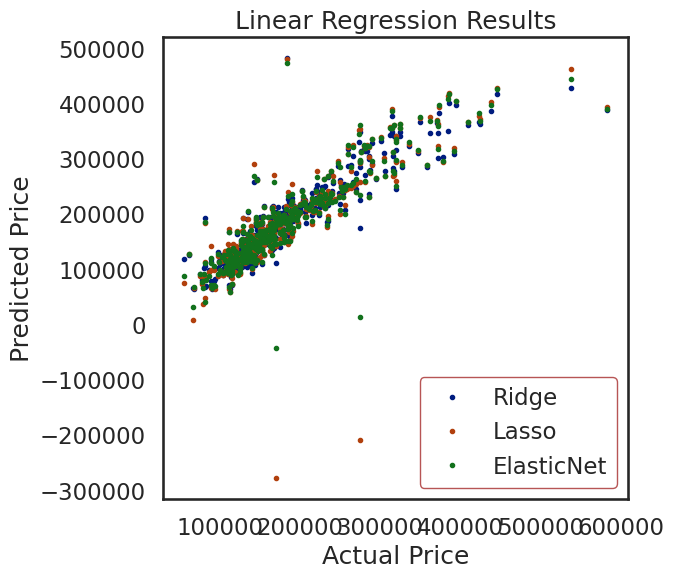

In [63]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for model, label in zip(models, labels):
    ax.plot(y_test, model.predict(X_test), 
             marker='o', ls='', ms=3.0, label=label)


leg = plt.legend()    # frameon=True <<< visible legend border frame
leg.get_frame().set_edgecolor('brown')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

plt.show()

## Question 8

Let's explore Stochastic gradient descent in this exercise.\
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.\
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

*   Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
*   Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
*   Do not scale the data before fitting the model.
*   Compare the results to those obtained without using stochastic gradient descent.


In [64]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {'Linear': {'penalty': None},
                         'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},
                         'Ridge': {'penalty': 'l1', 'alpha': ridgeCV_rmse},
                         'ElasticNet': {'penalty': 'elasticnet',  
                                        'alpha': elasticNetCV.alpha_, 
                                        'l1_ratio': elasticNetCV.l1_ratio_}}

model_parameters_dict

{'Linear': {'penalty': None},
 'Lasso': {'penalty': 'l2', 'alpha': np.float64(0.0005)},
 'Ridge': {'penalty': 'l1', 'alpha': np.float64(31973.653030381272)},
 'ElasticNet': {'penalty': 'elasticnet',
  'alpha': np.float64(0.0005),
  'l1_ratio': np.float64(0.1)}}

In [65]:
new_rmses = {}

for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    print("Model name:", modellabel)
    print("Parameters:", parameters)
    # print("Parameters key:", *parameters) # print key
    SGD = SGDRegressor(**parameters)  # works like **kwarg 
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    print(new_rmses)

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

Model name: Linear
Parameters: {'penalty': None}
{'Linear': np.float64(1585825319850997.8)}
Model name: Lasso
Parameters: {'penalty': 'l2', 'alpha': np.float64(0.0005)}
{'Linear': np.float64(1585825319850997.8), 'Lasso': np.float64(3540899212144562.5)}
Model name: Ridge
Parameters: {'penalty': 'l1', 'alpha': np.float64(31973.653030381272)}
{'Linear': np.float64(1585825319850997.8), 'Lasso': np.float64(3540899212144562.5), 'Ridge': np.float64(2082805016122933.2)}
Model name: ElasticNet
Parameters: {'penalty': 'elasticnet', 'alpha': np.float64(0.0005), 'l1_ratio': np.float64(0.1)}
{'Linear': np.float64(1585825319850997.8), 'Lasso': np.float64(3540899212144562.5), 'Ridge': np.float64(2082805016122933.2), 'ElasticNet': np.float64(5289159465334501.0)}


,RMSE,RMSE-SGD
Linear,42032.095071,1.585825e+15
Ridge,31973.653030,2.082805e+15
Lasso,46068.247637,3.540899e+15
ElasticNet,35955.254370,5.289159e+15


Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

*   Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
*   Re-compute the errors for all the penalties and compare.


In [66]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {'Linear': {'penalty': None},
                         'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},
                         'Ridge': {'penalty': 'l1', 'alpha': ridgeCV_rmse},
                         'ElasticNet': {'penalty': 'elasticnet', 'alpha': elasticNetCV.alpha_,
                                        'l1_ratio': elasticNetCV.l1_ratio_}}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,42032.095071,1.585825e+15,72755.773668
Ridge,31973.653030,2.082805e+15,75721.242335
Lasso,46068.247637,3.540899e+15,77548.009681
ElasticNet,35955.254370,5.289159e+15,72752.159034


Now let's scale our training data and try again.

*   Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
*   Using the scaler, transform `X_test` and create a variable `X_test_scaled`.
*   Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,42032.095071,1.585825e+15,72755.773668,32225.067441
Ridge,31973.653030,2.082805e+15,75721.242335,77786.134941
Lasso,46068.247637,3.540899e+15,77548.009681,32259.609053
ElasticNet,35955.254370,5.289159e+15,72752.159034,32269.693169


***

### Machine Learning Foundation (C) 2020 IBM Corporation
